In [1]:
import astropy.units as u
import numpy as np
%pylab inline
import matplotlib.patches as patches

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# star with M=1Msun at d=250pc
M_star = 1*u.Msun
d_star = 250*u.pc

# spectral binaries limits ======================================

# minima and maxima are in terms of q
# these results are from simulated data in EB2018
spec_qmin, spec_qmax = 0.4, 0.8
spec_qmax_excess_flux = 1

# minimum separation set by dv=10km/s
# this is 1AU for a solar mass star
spec_amin = 1

# maximum separation set by RVS slit width=1.8arcsec
# this calculation reproduces a=200AU for sep=0.8"
spec_sepmax = 1.8*u.arcsec
spec_amax = (d_star*np.tan(spec_sepmax.to(u.rad))).to(u.au).value

# HR diagram limits ==============================================

# minimum set by minimum magnitude distance from main sequence
# based on HR diagram plot of APOGEE binaries from Adrian, 
# I computed dm=0.4-0.7, and then used mass ratios from El-Badry 2018b Figure 9
hr_qmin = 0.8

# maximum separation set by slit width of photometry instrument
# assuming RVS for now, which is probably wrong
hr_amax = spec_amax

# rv limits =======================================================
# taken from m=11.9 contour (1Msun at 250pc) in Chance 2022 Figure 2
rv_loga = np.arange(-2,1.5,0.5)

rv_logq_lower = np.array([-1.9,-1.8,-1.6,-1.5,-1.4,-0.8,1.1])
rv_logq_upper = np.array([-0.9,-0.7,-0.5,0,0,0,0])# for m=12

/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_33878/500954058.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axvspan(0, hr_amax, ymin=hr_qmin, ymax=1, alpha=0.5,


Text(0.5, 1.0, 'M = 1M$_\\odot$, d = 250pc')

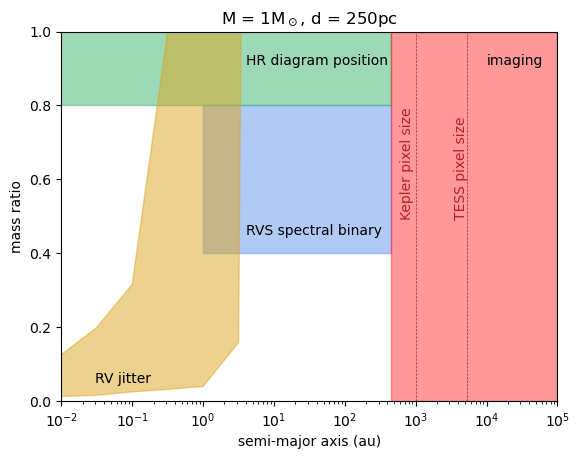

In [49]:
# next I need to plot the limits from Chance
# I feel like there's an upper limit but I'll just work on the lower one...
spec_color='cornflowerblue'
rv_color='goldenrod'
hr_color='MediumSeaGreen'

axvspan(spec_amin, spec_amax, ymin=spec_qmin, ymax=spec_qmax, 
        alpha=0.5, color=spec_color)

axvspan(0, hr_amax, ymin=hr_qmin, ymax=1, alpha=0.5,
        color=hr_color, edgecolor=hr_color)

fill_between(10**rv_loga, 10**rv_logq_lower, y2=10**rv_logq_upper,
             alpha=0.5, color=rv_color)

# temporary, just for group meeting
axvspan(spec_amax,1e5,ymin=0,ymax=1,color='r', alpha=0.4)
text(1e4,0.91,'imaging')

tess_pixel_sep = 21*u.arcsec
tess_pixel_a = (d_star*np.tan(tess_pixel_sep.to(u.rad))).to(u.au).value
axvline(tess_pixel_a, color='firebrick', ls='--', lw=0.5)
text(3500,0.5,'TESS pixel size', rotation=90, color='firebrick')

kepler_pixel_sep = 4*u.arcsec
kepler_pixel_a = (d_star*np.tan(kepler_pixel_sep.to(u.rad))).to(u.au).value
axvline(kepler_pixel_a, color='firebrick', ls='--', lw=0.5)
text(600,0.5,'Kepler pixel size', rotation=90, color='firebrick')

xscale('log');xlim(0.01,1e5)
ylim(0,1)
xlabel('semi-major axis (au)')
ylabel('mass ratio')
text(0.03,0.05, 'RV jitter')
text(4,0.45, 'RVS spectral binary')
text(4,0.91, 'HR diagram position')
title(r'M = 1M$_\odot$, d = 250pc')

In [ ]:
# I think I just need to understand,
# how does a companion move it along the diagram
# think of 1Msun + 1Msun
# and 1Msun + 0.1Msun (which shouldn't move it)
# should I move on to the RUWE?
# maybe I should summarize my notes on this.
# how about the ones that are really close in? shouldn't those be SB2? 
# but we aren't sensitive to SB2 in RVS...


In [17]:
# add in RUWE
# from meeting notes:
# for q=1 binaries at 250pc, RUWE goes down to 12 au
# but then what about for q=0.5? it probably goes out less far
# I'm not sure how to find this information...

# should I add the TESS slit width here?
# I'll just use the pixel size
# which is 21"
# how to convert to AU

In [23]:
import astropy.units as u

In [28]:
tess_sep = 21*u.arcsec
tess_a = (d_star*np.tan(tess_sep.to(u.rad))).to(u.au).value
tess_a

5250.000018139544